# `nbmediasplit`というipynbファイルから画像・音声を抽出するためのスクリプトをPyPIで公開しました

`nbmediasplit`というipynbファイルにbase64エンコードされて埋め込まれた画像・音声を抽出するためのスクリプトをPyPIで公開しました。

* [PyPI](https://pypi.org/project/nbmediasplit/)
* [GitHub](https://github.com/wrist/nbmediasplit)

この記事では使い方と使用しているツールについて簡単に記述します。

## インストール・使い方

* `pip install nbmediasplit`を実行
    * `nbmediasplit`コマンドが使用可能となる

In [1]:
!pip install nbmediasplit

     |████████████████████████████████| 92kB 798kB/s eta 0:00:01
     |████████████████████████████████| 122kB 5.4MB/s eta 0:00:01
ERROR: distributed 2.5.2 has requirement dask>=2.3, but you'll have dask 2.2.0 which is incompatible.
  Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
  Found existing installation: beautifulsoup4 4.8.1
    Uninstalling beautifulsoup4-4.8.1:
      Successfully uninstalled beautifulsoup4-4.8.1


In [2]:
!nbmediasplit --help

Usage: nbmediasplit [OPTIONS] IPYNB_FILE

  extract base64 encoded image and pcm and save them into specified
  directories.

Options:
  -i, --imgdir TEXT    directory to store image
  -w, --wavdir TEXT    directory to store audio
  -o, --output TEXT    output ipynb file path
  -e, --encoding TEXT  input ipynb encoding  [default: utf-8]
  -d, --debug          use debug mode
  --img-prefix TEXT    path prefix for src attribute of img tag
  --wav-prefix TEXT    path prefix for src attribute of source tag under audio
                       tag

  --help               Show this message and exit.


### ipynbファイルから画像を抽出

In [3]:
!nbmediasplit work/test.ipynb -i work/img

In [4]:
!ls work/img

0.png  1.png  2.png  3.png  4.png  5.png


現在のスクリプトではコードセルのoutputに埋め込まれた画像だけでなく、markdownセルに埋め込まれたattachmentも同時に抽出されます。

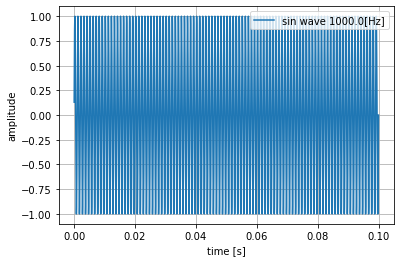

In [5]:
from IPython.display import Image
Image("work/img/0.png")

### ipynbファイルから音声を抽出

In [6]:
!nbmediasplit work/test.ipynb -w work/wav

In [7]:
!ls work/wav

0.wav  1.wav  2.wav


上記はコードセルのoutputに埋め込まれた音声を抽出します。0.wavは1kHz、FS48kHzの正弦波です。振幅が大きい(0dBFS)のでヘッドホンで再生する場合はご注意ください。
なお`-i`オプションと`-w`を同時に付けることで画像と音声を同時に抽出することもできます。

In [10]:
from IPython.display import Audio
Audio("work/wav/0.wav")

### ipynbファイルから画像・音声を抽出し、ipynbファイルのbase64エンコード部分を実ファイルパスに置換したipynbファイルを新規に作成

`-o`オプションを付けると、入力したipynbにおいてbase64エンコードされて埋め込まれた画像・音声を実ファイルへのパスに置換したipynbを新規に作成します。

In [27]:
!nbmediasplit work/test.ipynb -i work/img -w work/wav -o work/test_converted.ipynb

In [28]:
!grep img work/test_converted.ipynb

                            "<img src=\"work/img/0.png\" />"
                            "<img src=\"work/img/1.png\" />"
                        "<img src=\"work/img/2.png\" />"
                            "<img src=\"work/img/3.png\" />"
                            "<img src=\"work/img/4.png\" />"
                            "<img src=\"work/img/5.png\" />"


In [29]:
!grep audio work/test_converted.ipynb

                "Unless you trust the notebook converted by nbmediasplit, you can't load audio source in Jupyter.\n",
                        "text/html": "<audio controls preload=\"none\"><source src=\"work/wav/0.wav\" type=\"audio/wav\" /></audio>",
                "# single audio tag\n",
                        "text/html": "<audio controls preload=\"none\"><source src=\"work/wav/1.wav\" type=\"audio/wav\" /></audio>",
                        "text/html": "<audio controls preload=\"none\"><source src=\"work/wav/2.wav\" type=\"audio/wav\" /></audio>",
                "# multiple audio tag\n",


更に、`--img-prefix`、`--wav-prefix`オプションを指定すると出力ipynb中のパスを指定したパスへと変更することができます。
これは実際にファイルを出力させる場所と実際に参照させたいパスが違うケースで有効です。
下記の場合だとwork以下に出力されたipynbでは`work/img`などではなく`img`を参照しなければ相対パスが合いませんが、これらのオプションでこの部分を修正することができます。

In [30]:
!nbmediasplit work/test.ipynb -i work/img -w work/wav -o work/test_converted.ipynb --img-prefix=img --wav-prefix=wav

In [31]:
!grep img work/test_converted.ipynb

                            "<img src=\"img/0.png\" />"
                            "<img src=\"img/1.png\" />"
                        "<img src=\"img/2.png\" />"
                            "<img src=\"img/3.png\" />"
                            "<img src=\"img/4.png\" />"
                            "<img src=\"img/5.png\" />"


In [32]:
!grep audio work/test_converted.ipynb

                "Unless you trust the notebook converted by nbmediasplit, you can't load audio source in Jupyter.\n",
                        "text/html": "<audio controls preload=\"none\"><source src=\"wav/0.wav\" type=\"audio/wav\" /></audio>",
                "# single audio tag\n",
                        "text/html": "<audio controls preload=\"none\"><source src=\"wav/1.wav\" type=\"audio/wav\" /></audio>",
                        "text/html": "<audio controls preload=\"none\"><source src=\"wav/2.wav\" type=\"audio/wav\" /></audio>",
                "# multiple audio tag\n",


埋め込まれているパス名が変わっていることが分かると思います。

なお、出力ファイルである変換後のipynbにパスとして埋め込まれた画像ファイルを表示したりオーディオファイルを再生する場合はそのnotebookをtrustedなものとしなければなりません。このためには下図のようにコマンドパレットからTrust Notebookを実行する必要があります。

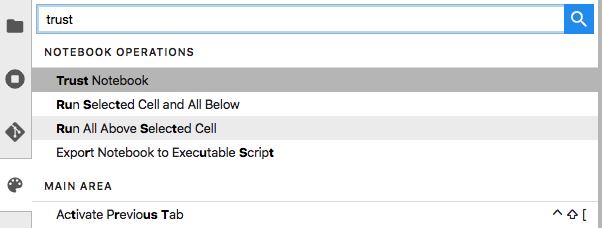

In [33]:
Image("work/img/2.png")

## 開発時に使用した各種ツール類

このスクリプトを作成する際に下記ライブラリを使用しています。

* `poetry`
    * 依存関係の処理
    * パッケージング、公開
* `click`
    * 引数処理
* `pytest`
    * テスト
* `invoke`
    * コマンドラインタスク実行
* `autopep8`
    * スクリプトの整形
    * 当初blackを試したが、ネストされたエスケープ付きのダブルクォーテーションのエスケープ文字を除去するなど適さない動作があったため不採用
* `beautifulsoup4`、`lxml`
    * HTMLの加工処理
* `soundfile`
    * 音声処理
    
また、自動テストのためにgithub actionsを使用しています。
ここではこれらの項目の一部についてそれぞれ簡単に触れたいと思います。

### `poetry`

poetryでは依存ライブラリの処理やパッケージング、PyPIへの公開などを行いました。

* `poetry init`
    * `pyproject.toml`を生成
* `poetry add library_name`
    * 依存関係を追加
    * `-D`を付けると開発用ライブラリとして追加
* `poetry install`
    * 依存ライブラリをインストール
* `poetry run ...`
    * 仮想環境内でコマンドを実行
    * 例
        * `poetry run python ...`  # スクリプトの実行
        * `poetry run pytest`  # テストの実行
        * `poetry run nbmediasplit`  # 追加したコマンド(後述)の実行
* `poetry build`
    * 公開用に諸々のビルドを実行してくれる
* `poetry publish`
    * PyPIに公開
    * `-r testpypi`などと指定すると公開先をTestPyPIなどに変更可能

#### プロジェクトのファイル構造

ファイル構造は概ね下記のようになっています。

```sh
├── dist
├── poetry.lock
├── pyproject.toml
├── readme.md
├── src
│   ├── nbmediasplit
│   │   ├── __init__.py
│   │   ├── nbmediasplit.py
│   └── nbmediasplit.egg-info
│       ├── PKG-INFO
│       ├── SOURCES.txt
│       ├── dependency_links.txt
│       ├── entry_points.txt
│       ├── requires.txt
│       └── top_level.txt
├── tasks.py
├── tests
    ├── __init__.py
    ├── input
    └── test_nbmediasplit.py
```

#### PyPIでの公開時にコマンドとして実行できるスクリプトの指定

下記記述を`pyproject.toml`に行うことで、`nbmediasplit`コマンドがPyPIでの公開時に使用できるようになります。

```toml
[tool.poetry.scripts]
nbmediasplit = "nbmediasplit.nbmediasplit:main"
```

これは`nbmediasplit`ライブラリの`nbmediasplit.py`ファイルにおける`main`関数を実行するという意味です。

#### PyPIページの説明を`readme.md`から読み込む設定

```toml
[tool.poetry]
readme = "readme.md"
```

と指定しておくとPyPI側でも勝手に`readme.md`を使用してくれるようになります。

### `click`

スクリプトに対して引数を指定するために使いました。clickでは容易にサブコマンドなどを作ることができると聞きますが、ここでは単なる引数の指定だけであるため、argparseでできることとほぼ同じことを行っています。argparseではコードとして引数関連の処理を書きますが、clickではデコレータとして処理が下記のように書けるので記述が散らばらず、かつ煩雑にならずに済みます。

```python
@click.command(help='extract base64 encoded image and pcm and save them into specified directories.')
@click.argument('ipynb_file', type=click.Path(exists=True))
@click.option('-i', '--imgdir', 'img_out_dir', type=str, help='directory to store image', required=False)
@click.option('-w', '--wavdir', 'wav_out_dir', type=str, help='directory to store audio', required=False)
@click.option('-o', '--output', 'new_ipynb_filename', type=str, help='output ipynb file path', required=False)
@click.option('-e', '--encoding', 'encoding', type=str, help='input ipynb encoding',
              required=False, default="utf-8", show_default=True)
@click.option('-d', '--debug', 'use_debug', is_flag=True, help='use debug mode', required=False)
@click.option('--img-prefix', 'img_prefix', type=str, help='path prefix for src attribute of img tag', required=False)
@click.option('--wav-prefix', 'wav_prefix', type=str,
              help='path prefix for src attribute of source tag under audio tag', required=False)
def main(ipynb_file, img_out_dir, wav_out_dir, new_ipynb_filename, img_prefix, wav_prefix, encoding, use_debug):
    ...
```

`@click.command`でclickが扱う対象とする関数を指定し、`@click.argument`はオプション扱いではない引数(引数として指定するための`-x`や`--xxx`が不要な引数)、`@click.option`はオプション扱いとなる引数を指定しています。

### `invoke`

当初はコマンドラインタスクを`Makefile`で記述していましたが、Windows環境でもテストする場合にMakefileだと(nmakeを使えば使えなくはないですが)面倒なので、共通して使うことができるタスク処理環境としてinvokeを使ってみました。
invokeでは`tasks.py`の内部に`@task`デコレータが付与された関数を定義しておくと`inv 関数名`としてタスクを実行できるようになります。
下記に`tasks.py`の一部を抜粋します。

```python
@task
def clean(c):
    """clean generated files"""
    ...

@task(pre=[clean])
def pytest(c):
    """execute pytest"""
    c.run("poetry run pytest")

@task(pre=[clean])
def cuitest(c, debug=False):
    """execute cuitest"""
    ...
```

`@task`に対して`pre`や`post`に依存タスクの一覧をlistとして与えることができます。
また各タスクの引数、たとえば`cuitest`の`debug`は`inv cuitest --debug=True`や`inv cuitest -d=True`としてinvコマンド使用時に指定することができます。

### GitHub Actionsでのpoetryを用いたpytestの実行

複数バージョンのpythonや複数プラットフォーム上でpytestを実行する場合はtoxを使うこともできますが、
今回はGitHub Actionsを使ってみたかったので下記のようなworkflowを定義したyamlファイルを`.github/workflows/pytest.yaml`として配置しています。
`poetry install`で依存ライブラリをインストールし、`poetry pytest`を複数バージョン、複数プラットフォーム上で実行しています。

```yaml
name: pytest

on: [push]

jobs:
  build:

    runs-on: ${{ matrix.os }}
    strategy:
      matrix:
        python-version: [3.5, 3.6, 3.7, 3.8]
        os: [ubuntu-latest, macos-latest, windows-latest]

    steps:
    - uses: actions/checkout@v2
    - name: Set up Python ${{ matrix.python-version }} on ${{ matrix.os }}
      uses: actions/setup-python@v2
      with:
        python-version: ${{ matrix.python-version }}
    - name: Install dependencies
      run: |
        python -m pip install --upgrade pip
        pip install poetry
        poetry install
    - name: Test with pytest
      run: |
        poetry run pytest
```

## 今回のスクリプトを作成した動機

ipynbでブログを書く際にbase64エンコードされたデータがそのままになっている(分離されていない)とファイルサイズが非常に大きくなることがあったため、過去に分離用の単一のスクリプトを書いて使用していたのですが、これをちゃんとした形(各種引数の付与、テストの付与など)として公開したかったためです。
poetryでは新規にプロジェクトを始める場合でなくとも、`poetry init`で`pyproject.toml`ファイルを生成することができるため、比較的容易に元スクリプトを加工して形を整えていくことができました。

## 今後

現在は画像ファイルの抽出時にattachmentとコードセル出力を等価なものとして扱っていますがこれを分離できればと思っています。また、現在は単なる連番としてファイルが出力されてしまいますが、何らかの形でコードセルの情報(execution countなど)と紐付けた名称にした方が良いとも感じています。
余力があればjupyter labのextensionとして実行できるようにもしてみたいと思いました。

またバグを見つけましたら報告いただけると幸いです。